# Import the Dataset


In [ ]:
import sns
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# fetch dataset 

adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

# Creating Dataframe Using Data columns

In [ ]:
adult_X=pd.DataFrame(X)

In [ ]:
adult_X

## Creating dataframe using target column

In [ ]:
adult_Y= pd.DataFrame(y)

In [ ]:

adult_Y

## Concat two DataFrames together

In [ ]:
adult_data = pd.concat([adult_X,adult_Y], axis=1)
adult_data

In [ ]:
adult_data.info()

In [ ]:
adult_data.describe()

### Finding duplicates

In [131]:
adult_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

### Remove duplicates

In [ ]:
adult_data.drop_duplicates(inplace=True)
print("Number of rows after droping duplicated rows: ", len(adult_data))

### Finding outliers

In [134]:
import pandas as pd
from scipy.stats import iqr
import numpy as np
def find_outliers_iqr(data):
  outliers = {}  # Dictionary to store outliers for each numeric column
  inliers = data.copy()  # Working on a copy for inliers

  for col in data.select_dtypes(include=[np.number]):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = iqr(data[col])
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify outliers in this column
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Remove outliers from inliers dataframe
    inliers = inliers.loc[(inliers[col] >= lower_bound) & (inliers[col] <= upper_bound)]

  return inliers, outliers

# Example usage
adult_data_filtered = adult_data.copy()  # Working on a copy to avoid modifying original data
inliers, outliers_df = find_outliers_iqr(adult_data_filtered)

print("Number of inliers:", len(inliers))
print("Outlier Values.")

outliers_df

Number of inliers: 28541
Outlier Values.


{'age':        age         workclass  fnlwgt     education  education-num  \
 74      79           Private  124744  Some-college             10   
 222     90           Private   51744       HS-grad              9   
 430     80                 ?  107762       HS-grad              9   
 918     81  Self-emp-not-inc  136063       HS-grad              9   
 1040    90           Private  137018       HS-grad              9   
 ...    ...               ...     ...           ...            ...   
 48524   80           Private  107740       HS-grad              9   
 48564   80  Self-emp-not-inc   29441       7th-8th              4   
 48667   83           Private  192305  Some-college             10   
 48709   79         Local-gov  132668       HS-grad              9   
 48812   81               NaN   26711     Assoc-voc             11   
 
               marital-status         occupation    relationship   race  \
 74        Married-civ-spouse     Prof-specialty  Other-relative  White   
 

### Plot outliers

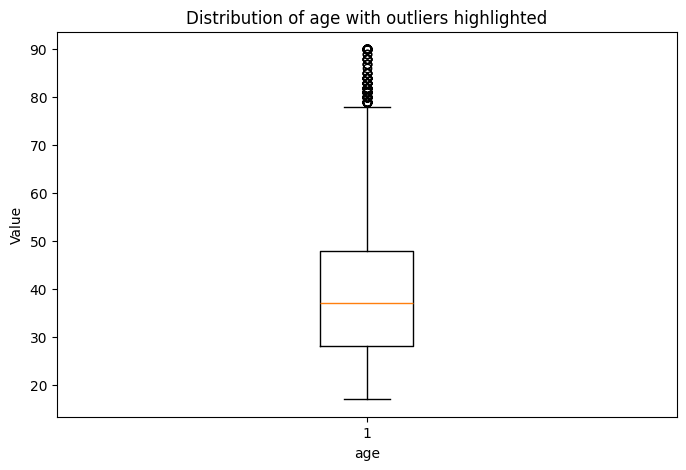

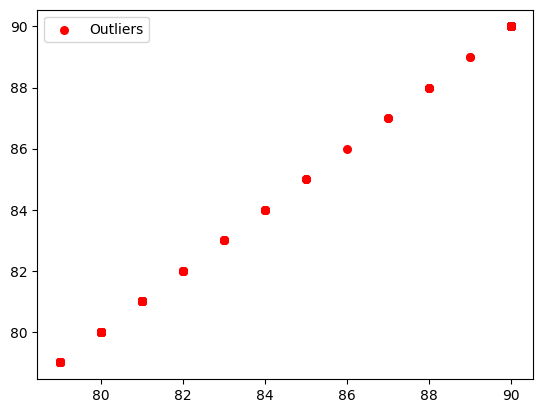

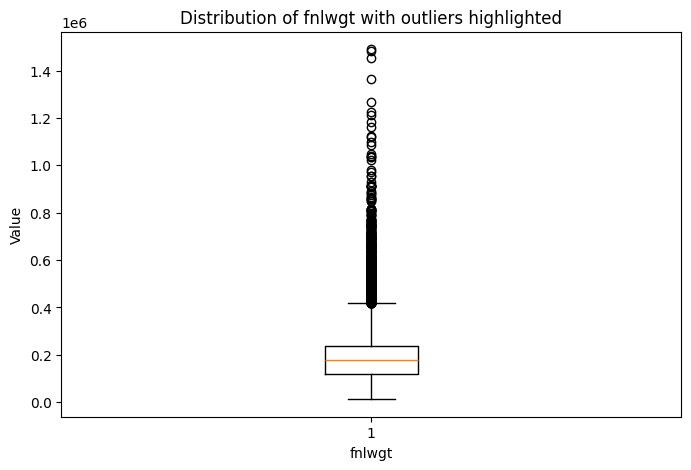

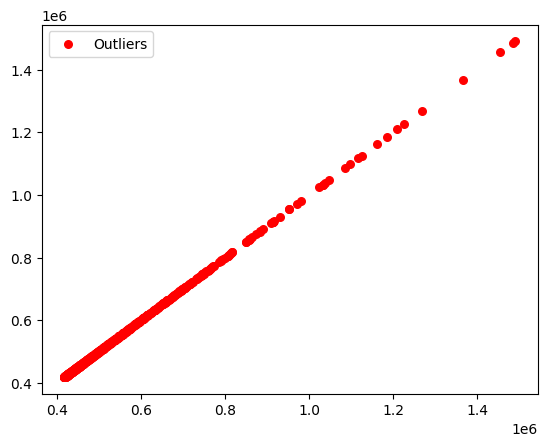

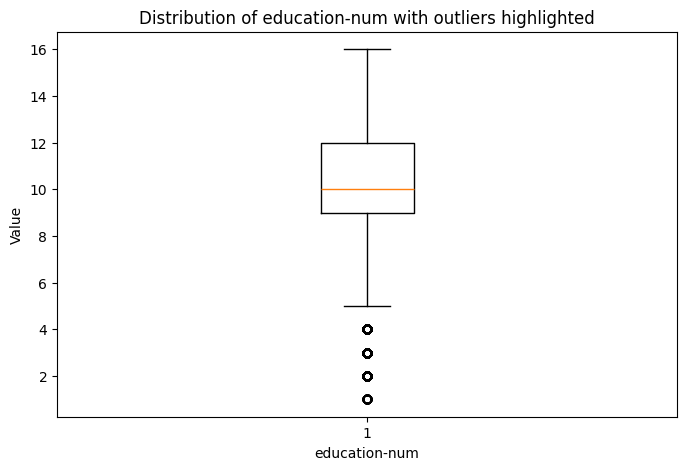

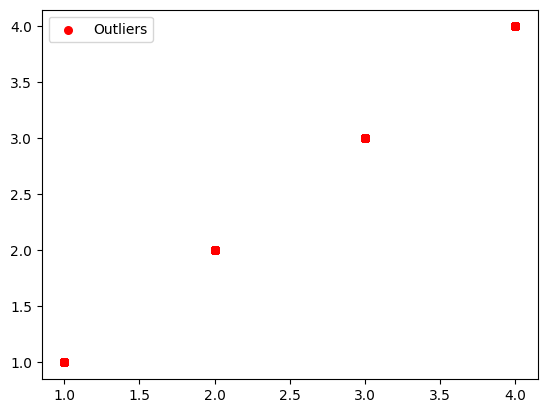

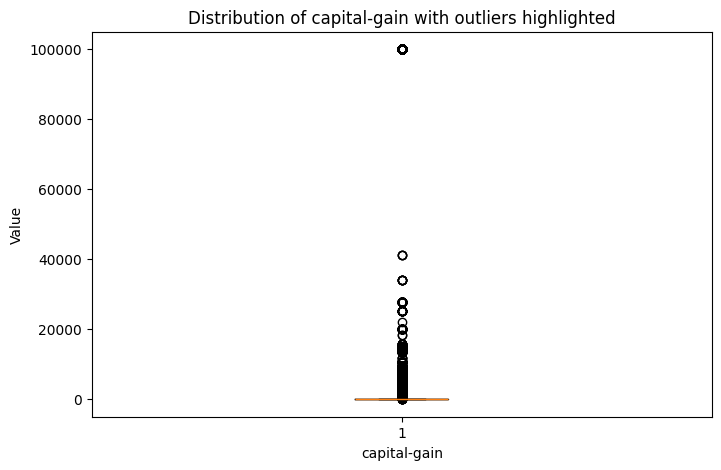

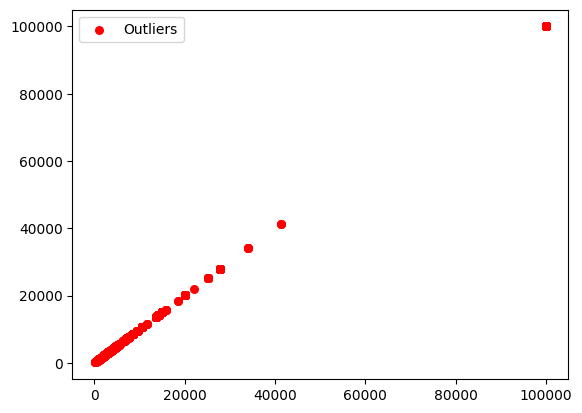

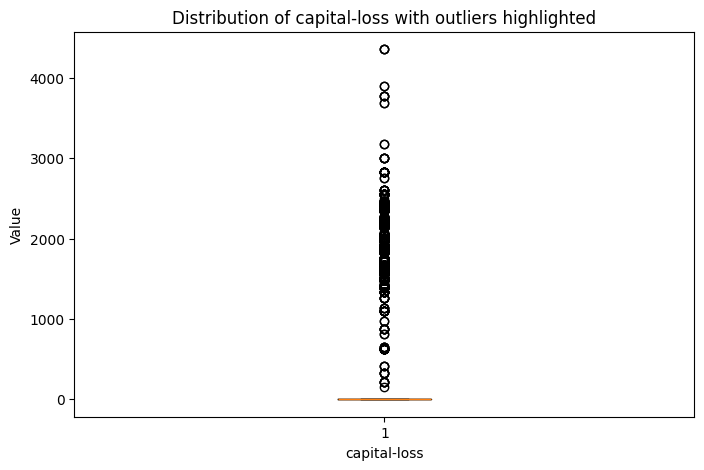

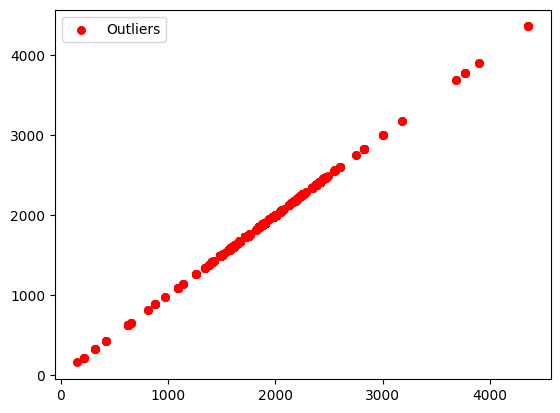

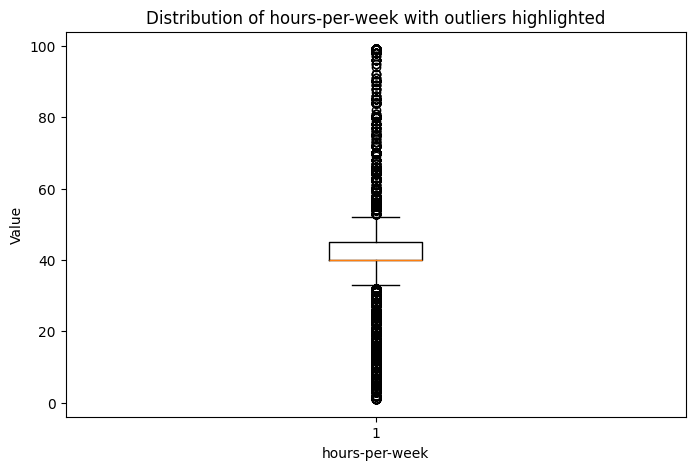

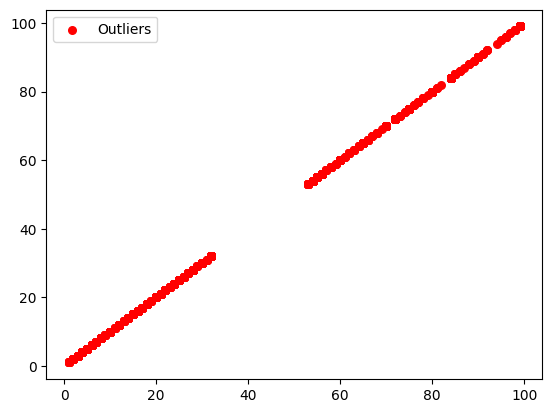

In [135]:
import matplotlib.pyplot as plt

def plot_outliers_iqr(data, col_name):
  
  Q1 = data[col_name].quantile(0.25)
  Q3 = data[col_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  # Plot the distribution
  plt.figure(figsize=(8, 5))
  plt.boxplot([data[col_name]])
  plt.title(f"Distribution of {col_name} with outliers highlighted")
  plt.xlabel(col_name)
  plt.ylabel("Value")
  plt.show()

  # Highlight outliers with red dots
  outliers = (data[col_name] < lower_bound) | (data[col_name] > upper_bound)
  plt.scatter(data.loc[outliers, col_name], data.loc[outliers, col_name], color='red', marker='o', s=30, label='Outliers')
  plt.legend()
  plt.show()

# Example usage (assuming you've identified outliers using IQR)
col_to_plot = 'age'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'fnlwgt'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'education-num'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'capital-gain'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'capital-loss'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'hours-per-week'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

### Remove outliers

In [136]:
import pandas as pd
from scipy.stats import iqr

def remove_outliers_iqr(data, cols):
  """
  Remove outliers from a pandas DataFrame using Interquartile Range (IQR).

  Args:
      data: pandas DataFrame containing the data.
      cols: List of column names to check for outliers.

  Returns:
      A new pandas DataFrame with outliers removed.
  """
  outliers = data.copy()  # Working on a copy for inliers

  for col in cols:
    if col in data.columns:  # Check if column exists before processing
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - (1.5 * IQR)
      upper_bound = Q3 + (1.5 * IQR)
      outliers = outliers.loc[(outliers[col] >= lower_bound) & (outliers[col] <= upper_bound)]

  return outliers

# Check column names from downloaded data (replace with your actual check)
# if 'fnlwgt' not in adult.data.feature_names:
#   numeric_columns.remove('fnlwgt')  # Remove if 'fnlwgt' is missing
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# Apply outlier removal to numeric columns
adult_data_filtered = adult_data.copy()  # Working on a copy to avoid modifying original data
adult_data_filtered = remove_outliers_iqr(adult_data_filtered, numeric_features)

print("Number of rows after removing outliers:", len(adult_data_filtered))
adult_data_filtered

Number of rows after removing outliers: 28541


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.


### Checking null values

In [137]:
adult_data_filtered.isna().sum().any()
adult_data_filtered.isna().sum()

age                 0
workclass         397
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        399
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    168
income              0
dtype: int64

### Replace Missing Values with NaN

In [138]:
adult_data_filtered.replace('?',pd.NA,inplace=True)
adult_data_filtered

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.


### Clean the DatFrame values which has Nan 

In [139]:
cleaned_adult_df = adult_data_filtered.dropna()
cleaned_adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K.
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.


## Encode Categorical variables

In [141]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

Label_Encoder = {}

for col in categorical_features:
    Label_Encoder[col] = LabelEncoder()
    cleaned_adult_df[col] = Label_Encoder[col].fit_transform(cleaned_adult_df[col])
  
# Convert '>50K' and '>50K.' to 1, and '<=50K' and '<=50k.' to 0
cleaned_adult_df['income'] = cleaned_adult_df['income'].replace({'>50K': 1, '>50K.': 1, '<=50K': 0, '<=50K.': 0})


cleaned_adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,2,215646,8,9,0,5,1,4,1,0,0,40,37,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,338409,6,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,9,14,2,3,5,4,0,0,0,40,37,0
7,52,4,209642,8,9,2,3,0,4,1,0,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,25,2,350977,8,9,4,7,3,4,0,0,0,40,37,0
48835,48,1,349230,9,14,0,7,1,4,1,0,0,40,37,0
48836,33,2,245211,6,13,4,9,3,4,1,0,0,40,37,0
48837,39,2,215419,6,13,0,9,1,4,0,0,0,36,37,0


### Correction in the income column 

In [142]:
# Count the occurrences of each unique value in the 'income' column
income_counts = cleaned_adult_df['income'].value_counts()

# Extract counts for '>50K' and '<=50K'
greater_than_50k_count = income_counts[1] if 1 in income_counts else 0
less_than_or_equal_50k_count = income_counts[0] if 0 in income_counts else 0

# Print the counts
print("Count of values greater than 50k:", greater_than_50k_count)
print("Count of values less than or equal to 50k:", less_than_or_equal_50k_count)


Count of values greater than 50k: 5818
Count of values less than or equal to 50k: 21099


## Scale numerical values

In [143]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()
cleaned_adult_df[numeric_features]= scaler.fit_transform(cleaned_adult_df[numeric_features])

cleaned_adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,-0.009880,2,0.405036,8,-0.590897,0,5,1,4,1,0.0,0.0,-0.380840,37,0
3,1.259788,2,0.624293,1,-1.524273,2,5,0,2,1,0.0,0.0,-0.380840,37,0
4,-0.856326,2,1.816129,6,1.275854,2,9,5,2,0,0.0,0.0,-0.380840,4,0
5,-0.094525,2,1.197418,9,1.742541,2,3,5,4,0,0.0,0.0,-0.380840,37,0
7,1.175144,4,0.336024,8,-0.590897,2,3,0,4,1,0.0,0.0,0.875079,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,-1.110260,2,1.960591,8,-0.590897,4,7,3,4,0,0.0,0.0,-0.380840,37,0
48835,0.836565,1,1.940511,9,1.742541,0,7,1,4,1,0.0,0.0,-0.380840,37,0
48836,-0.433103,2,0.744870,6,1.275854,4,9,3,4,1,0.0,0.0,-0.380840,37,0
48837,0.074764,2,0.402427,6,1.275854,0,9,1,4,0,0.0,0.0,-1.385575,37,0


In [144]:
cleaned_adult_df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,2.691700e+04,26917.000000,2.691700e+04,26917.000000,2.691700e+04,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.0,26917.0,2.691700e+04,26917.000000,26917.000000
mean,1.974536e-16,2.143738,-1.166772e-16,7.503102,-6.256218e-17,2.521381,5.696437,1.401568,3.660661,0.673589,0.0,0.0,-2.317705e-16,35.612401,0.216146
std,1.000019e+00,0.943863,1.000019e+00,2.752085,1.000019e+00,1.519367,4.078862,1.591519,0.856133,0.468908,0.0,0.0,1.000019e+00,5.645155,0.411623
min,-1.787417e+00,0.000000,-1.915428e+00,0.000000,-2.457649e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-2.139126e+00,0.000000,0.000000
25%,-7.716819e-01,2.000000,-7.332934e-01,6.000000,-5.908974e-01,2.000000,2.000000,0.000000,4.000000,0.000000,0.0,0.0,-3.808397e-01,37.000000,0.000000
50%,-9.452509e-02,2.000000,-4.282187e-02,8.000000,-1.242097e-01,2.000000,6.000000,1.000000,4.000000,1.000000,0.0,0.0,-3.808397e-01,37.000000,0.000000
75%,6.672763e-01,2.000000,5.669471e-01,9.000000,8.091659e-01,4.000000,9.000000,3.000000,4.000000,1.000000,0.0,0.0,1.215279e-01,37.000000,0.000000
max,3.375903e+00,6.000000,2.727168e+00,11.000000,2.675917e+00,6.000000,13.000000,5.000000,4.000000,1.000000,0.0,0.0,2.633366e+00,39.000000,1.000000


## Training the dataset

In [145]:
from sklearn.model_selection import train_test_split

X = cleaned_adult_df.drop(columns=['income']) # all columns without income

y = cleaned_adult_df['income'] # target variable column

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



# Applying Gaussian Naive Bayes

### Train the classifier

In [146]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)



GaussianNB()

### Classification Report

In [147]:
from sklearn.metrics import classification_report

y_pred = nb_classifier.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4219
           1       0.51      0.67      0.58      1165

    accuracy                           0.79      5384
   macro avg       0.71      0.75      0.72      5384
weighted avg       0.82      0.79      0.80      5384


### Confusion Matrix

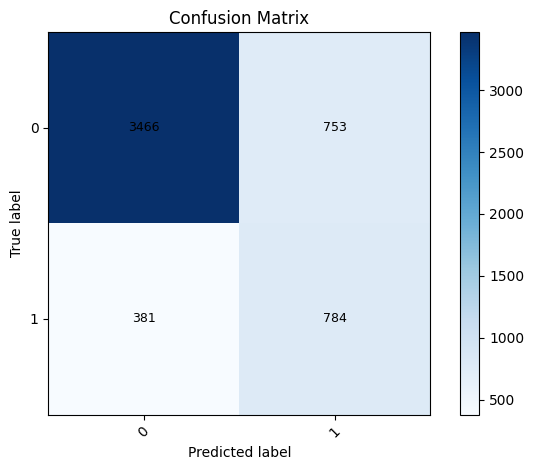

In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Assuming cm is your confusion matrix
fig, ax = plt.subplots()
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')

# Print confusion matrix values within the plot
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, str(z), ha='center', va='center', fontsize=9)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.tight_layout()
plt.show()
 

### Accuracy on Testing data

In [149]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Data:", test_accuracy)


Accuracy on Testing Data: 0.7893759286775631


### Accuracy on Training Data

In [150]:
# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
print("Accuracy on Training Data:", train_accuracy)


Accuracy on Training Data: 0.7884642177123485


### Applying PCA to the Naive Bayes to Improve model accuracy

In [151]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA(n_components=0.95)  # Retain 95% of variance

# Fit PCA on training data and transform training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain Naive Bayes classifier on PCA transformed data
nb_classifier_pca = GaussianNB()
nb_classifier_pca.fit(X_train_pca, y_train)

# Evaluate performance of Naive Bayes classifier on PCA transformed data
y_pred_pca = nb_classifier_pca.predict(X_test_pca)
test_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on Testing Data with PCA:", test_accuracy_pca)


Accuracy on Testing Data with PCA: 0.8103640416047548


### Hyperparameter Tuning

In [152]:
# Perform cross-validation to tune var_smoothing parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}  # Define var_smoothing values to try
nb_classifier_tuned = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
nb_classifier_tuned.fit(X_train, y_train)

print("Best cross-validation score:", nb_classifier_tuned.best_score_)


Best cross-validation score: 0.7878607622087894


## ROC-AUC Curve

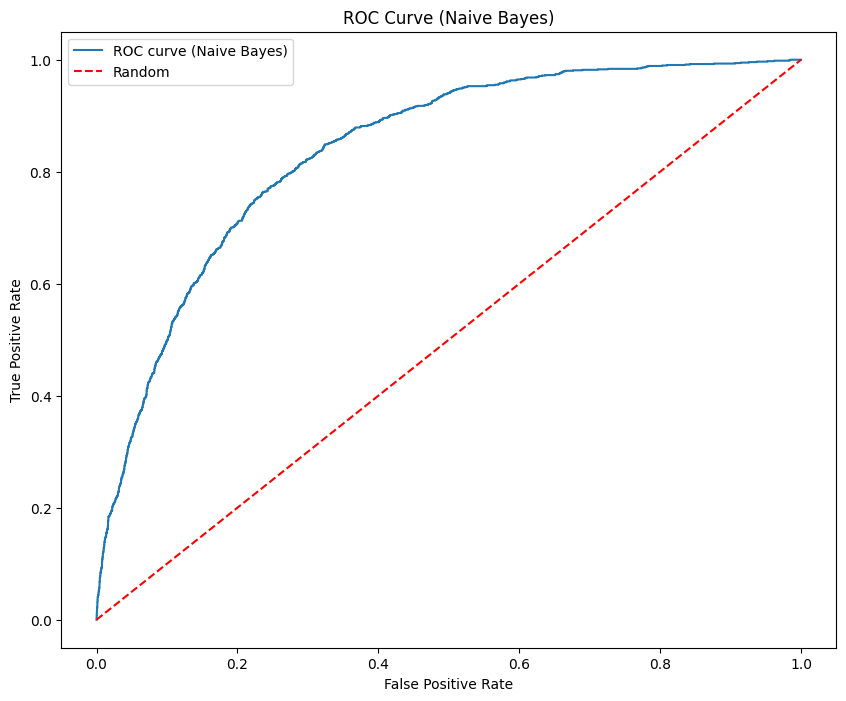

0.8375072098731774


In [169]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Get probabilities for positive class
y_prob_rf = nb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
 
AUC = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (Naive Bayes)')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Naive Bayes)')
plt.legend()
plt.show()

print("AUC value for Naive Bayes Classifier: ",AUC)